In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
matsim_1_000_000_path = Path("./matsim/output_1_000_000")
matsim_2_000_000_path = Path("./matsim/output_2_000_000")
matsim_3_000_000_path = Path("./matsim/output_3_000_000")


In [3]:
time_path = "stopwatch.csv"

_1_mil_time_df = pd.read_csv(Path(matsim_1_000_000_path, time_path),sep=";")
_2_mil_time_df = pd.read_csv(Path(matsim_2_000_000_path, time_path),sep=";")
_3_mil_time_df = pd.read_csv(Path(matsim_3_000_000_path, time_path),sep=";")

_1_mil_time_df.head()

,iteration,BEGIN iteration,BEGIN iterationStartsListeners,END iterationStartsListeners,BEGIN replanning,END replanning,BEGIN beforeMobsimListeners,BEGIN dump all plans,END dump all plans,END beforeMobsimListeners,...,replanning,dump all plans,beforeMobsimListeners,prepareForMobsim,mobsim,afterMobsimListeners,scoring,compare with counts,iterationEndsListeners,iteration.1
0,0,12:21:00,12:21:00,12:21:00,NaN,NaN,12:21:00,12:21:00,12:21:20,12:21:21,...,NaN,00:00:20,00:00:20,00:00:01,00:03:04,00:00:00,00:00:00,00:00:00,00:00:08,00:03:36
1,1,12:24:36,12:24:36,12:24:37,12:24:37,12:24:42,12:24:42,12:24:42,12:25:05,12:25:05,...,00:00:04,00:00:23,00:00:23,00:00:01,00:02:23,00:00:00,00:00:00,00:00:00,00:00:08,00:03:03
2,2,12:27:39,12:27:39,12:27:40,12:27:40,12:27:45,12:27:45,NaN,NaN,12:27:46,...,00:00:05,NaN,00:00:00,00:00:01,00:02:22,00:00:00,00:00:00,00:00:00,00:00:08,00:02:40
3,3,12:30:19,12:30:19,12:30:20,12:30:20,12:30:25,12:30:25,NaN,NaN,12:30:25,...,00:00:04,NaN,00:00:00,00:00:02,00:02:22,00:00:00,00:00:00,00:00:00,00:00:08,00:02:39
4,4,12:32:59,12:32:59,12:33:00,12:33:00,12:33:05,12:33:05,NaN,NaN,12:33:05,...,00:00:05,NaN,00:00:00,00:00:02,00:02:30,00:00:00,00:00:00,00:00:00,00:00:08,00:02:48


In [4]:
_1_mil_time_df.columns

Index(['iteration', 'BEGIN iteration', 'BEGIN iterationStartsListeners',
       'END iterationStartsListeners', 'BEGIN replanning', 'END replanning',
       'BEGIN beforeMobsimListeners', 'BEGIN dump all plans',
       'END dump all plans', 'END beforeMobsimListeners',
       'BEGIN prepareForMobsim', 'END prepareForMobsim', 'BEGIN mobsim',
       'END mobsim', 'BEGIN afterMobsimListeners', 'END afterMobsimListeners',
       'BEGIN scoring', 'END scoring', 'BEGIN iterationEndsListeners',
       'BEGIN compare with counts', 'END compare with counts',
       'END iterationEndsListeners', 'END iteration', 'Unnamed: 23',
       'iterationStartsListeners', 'replanning', 'dump all plans',
       'beforeMobsimListeners', 'prepareForMobsim', 'mobsim',
       'afterMobsimListeners', 'scoring', 'compare with counts',
       'iterationEndsListeners', 'iteration.1'],
      dtype='object')

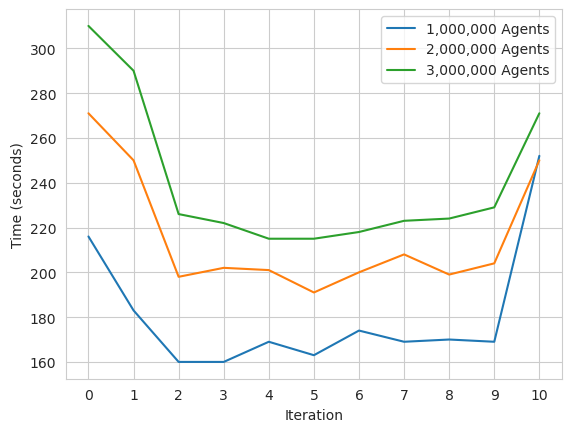

In [5]:
sns.set_style("whitegrid")

time_dict = {
    "1,000,000 Agents": _1_mil_time_df,
    "2,000,000 Agents": _2_mil_time_df,
    "3,000,000 Agents": _3_mil_time_df,
}

time_results = {}

for key, df in time_dict.items():
    x = []
    y = []

    start_list = df['BEGIN iteration'].values
    end_list = df['END iteration'].values
    str_format = '%H:%M:%S'

    for i in range(len(start_list)):
        start = datetime.strptime(start_list[i], str_format)
        end = datetime.strptime(end_list[i], str_format)
        diff = end - start
        seconds = diff.total_seconds()
        x.append(i)
        y.append(seconds)

    plt.plot(x,y,label=key)
    time_results[key] = np.mean(y)

plt.xticks(x)
plt.xlabel("Iteration")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

In [6]:
time_results

{'1,000,000 Agents': 180.45454545454547,
 '2,000,000 Agents': 215.8181818181818,
 '3,000,000 Agents': 240.27272727272728}

In [7]:
log_dir = "logfile.log"

_1_mil_time_log = Path(matsim_1_000_000_path, log_dir)
_2_mil_time_log = Path(matsim_2_000_000_path, log_dir)
_3_mil_time_log = Path(matsim_3_000_000_path, log_dir)

In [8]:
log_dict = {
    "1,000,000 Agents": _1_mil_time_log,
    "2,000,000 Agents": _2_mil_time_log,
    "3,000,000 Agents": _3_mil_time_log,
}


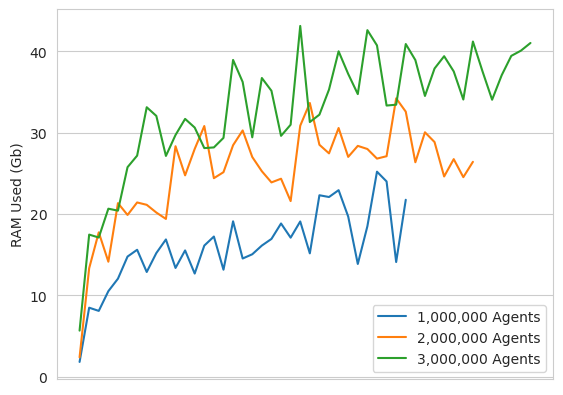

In [9]:
import re

max_ram = {}

for key, val in log_dict.items():

    with open(val, "r") as f:
        lines = f.read()

    vals = re.findall(r"used RAM:\s*(\d+)", lines)
    y = [int(val) / 1000 for val in vals]
    x = range(len(y))

    plt.plot(x, y, label=key)
    max_ram[key] = np.max(y)

plt.xticks([])
plt.ylabel("RAM Used (Gb)")
plt.legend()
plt.show()

In [10]:
max_ram

{'1,000,000 Agents': 25.194,
 '2,000,000 Agents': 34.215,
 '3,000,000 Agents': 43.121}

In [11]:
dist_dir = "ITERS/it.10/10.legHistogram.txt"

_1_mil_dist_df = pd.read_csv(Path(matsim_1_000_000_path, dist_dir),sep="\t")
_2_mil_dist_df = pd.read_csv(Path(matsim_2_000_000_path, dist_dir),sep="\t")
_3_mil_dist_df = pd.read_csv(Path(matsim_3_000_000_path, dist_dir),sep="\t")

In [12]:
_1_mil_dist_df.columns

Index(['time', 'time.1', 'departures_all', 'arrivals_all', 'stuck_all',
       'en-route_all', 'departures_car', 'arrivals_car', 'stuck_car',
       'en-route_car'],
      dtype='object')

In [13]:
_1_mil_dist_df[_1_mil_dist_df['departures_all'] != 0].head()

,time,time.1,departures_all,arrivals_all,stuck_all,en-route_all,departures_car,arrivals_car,stuck_car,en-route_car
12,01:00:00,3600,1268,29,0,1239,1268,29,0,1239
24,02:00:00,7200,2848,112,0,3031,2848,112,0,3031
36,03:00:00,10800,7330,275,0,7748,7330,275,0,7748
48,04:00:00,14400,15930,576,0,16987,15930,576,0,16987
60,05:00:00,18000,30038,1063,0,32855,30038,1063,0,32855


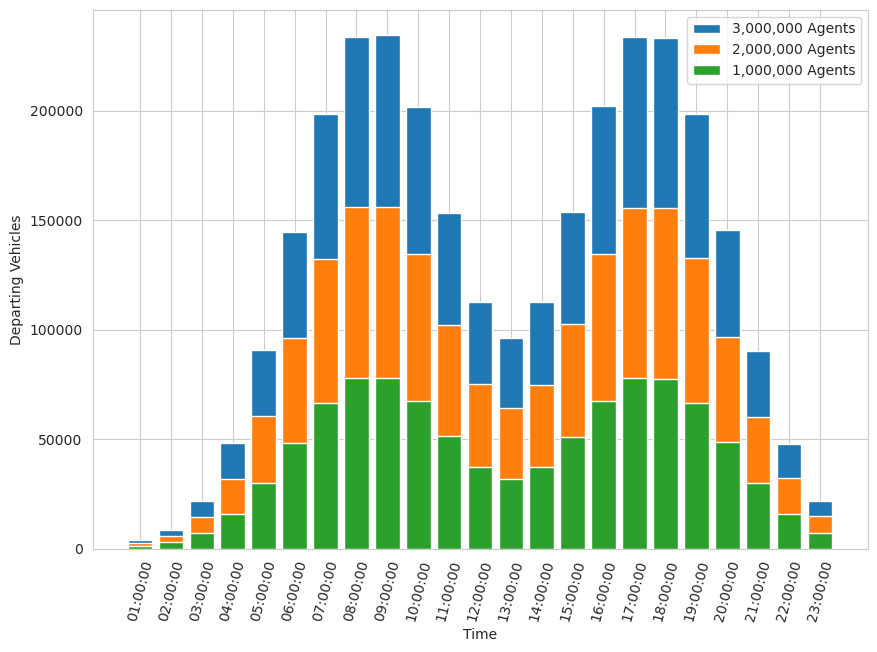

In [14]:
plt.figure(figsize=(10,7))
dist_dict = {
    "3,000,000 Agents": _3_mil_dist_df,
    "2,000,000 Agents": _2_mil_dist_df,
    "1,000,000 Agents": _1_mil_dist_df,
}

for key, df in dist_dict.items():

    x = df['time'].to_numpy()
    y = df['departures_all'].to_numpy()
    idxs = np.where(y != 0)[0]
    plt.bar(x[idxs],y[idxs],label=key)

plt.legend()
plt.xticks(rotation=75)
plt.ylabel("Departing Vehicles")
plt.xlabel("Time")
plt.show()

In [15]:
_10_output_path = Path("./cluster_outputs/output_10c/")
_50_output_path = Path("./cluster_outputs/output_50c/")
_100_output_path = Path("./cluster_outputs/output_100c/")
_200_output_path = Path("./cluster_outputs/output_200c/")